#### Use pima_Indian_Diabetes dataset  and perform the following:
1. Use preprocessing methods to clean the dataset.
2. Spit the dataset into Train and Test dataset, respectively.
3. Visualize your training data to know whether the relationship between dependent and independent variable is linear.
4. Use train dataset to create a decision tree model.
5. Use test dataset for predictions.
6. Access the accuracy of your model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BloodPressure, SkinThickness, Insulin, BMI can never be zero. So, we need to process on them.

In [5]:
cols_2_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_2_replace] = data[cols_2_replace].replace(0, np.nan)

In [6]:
data.isna().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

In [7]:
print(data.dropna(subset = ['BloodPressure','BMI','Glucose']).shape)
print(data.dropna(subset = ['BloodPressure','BMI','Glucose']).isna().sum())

(724, 9)
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
data.dropna(subset = ['BloodPressure','BMI','Glucose'], inplace=True)

In [9]:
X = data.drop(axis=1, labels='Outcome')
y = data['Outcome']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def preprop(features):
    X = features.copy()
    t = [('i_mode', SimpleImputer(strategy='most_frequent'), ['SkinThickness']),
         ('i_mean', SimpleImputer(strategy='mean'), ['Insulin'])]

    transformer = ColumnTransformer(transformers=t)
    X_trans =  transformer.fit_transform(X)
    X.loc[:, 'SkinThickness'] = X_trans[:,0]
    X.loc[:, 'Insulin'] = X_trans[:,1]
    return X

In [13]:
X_train = preprop(X_train)

In [14]:
X_train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

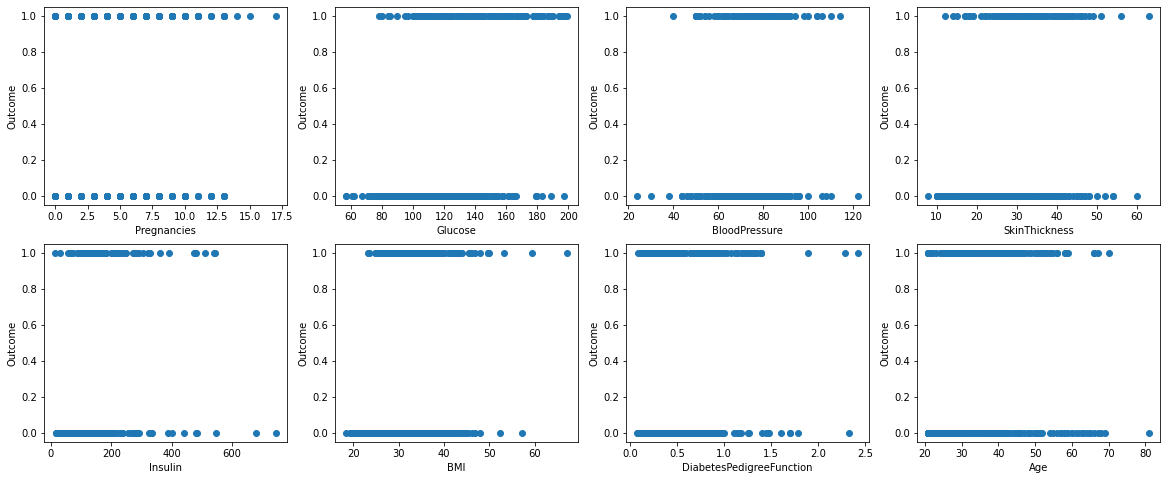

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,8))

x = 1
for i in X_train:
    plt.subplot(2, 4, x)
    plt.scatter(X_train[i],y_train)
    plt.xlabel(i)
    plt.ylabel('Outcome')
    x = x+1
    
plt.show()


#### <u>3.Visualize your training data to know whether the relationship between dependent and independent variable is linear.</u>

#### ==> Since independent variable is nominally categorical in nature we can't infer any linear relationship between dependent and independent varibles. As we can observe in the above plot.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4,shuffle=True, random_state=1)

dtc = DecisionTreeClassifier()

param_grid = [{'max_leaf_nodes': list(range(2, 100)),
               'min_samples_split': [2, 3, 4]}]

grid_search = GridSearchCV(dtc, param_grid, cv=skf, scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4)

In [17]:
# Training using the best_estimators_
dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1)
dtc.fit(X_train, y_train)

X_test = preprop(X_test)
y_pred = dtc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.7196652719665272


In [19]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, 'q1_tree.dot', feature_names = X_train.columns)

In [20]:
! dot -Tpng tree.dot -o q1_tree.png

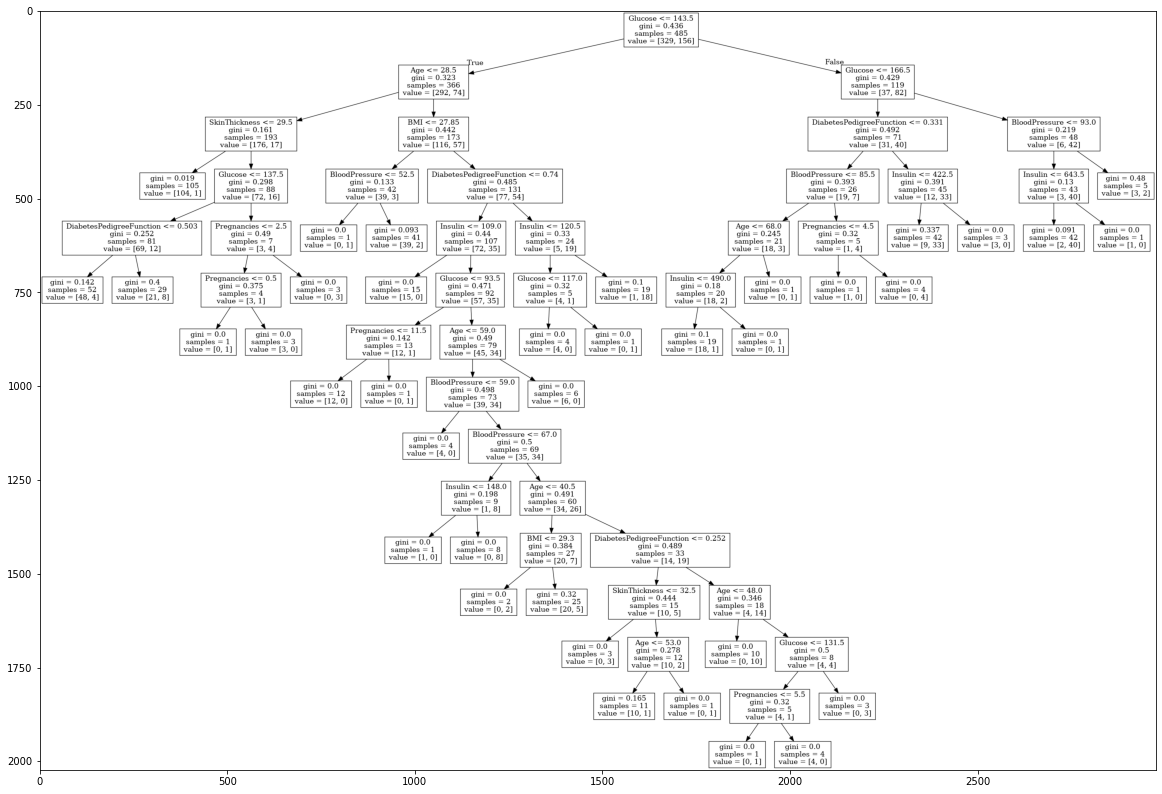

In [21]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = cv2.imread('q1_tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()